In [ ]:
!pip install numpy
!pip install tensorflow
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install resnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for resnet: filename=resnet-0.1-py3-none-any.whl size=10041 sha256=069d903576e60f2c474fdb5636f83067a7f36da5a4ad34e0d211028c3dd52b84
  Stored in directory: /root/.cache/pip/wheels/33/b0/d5/b61fef326e57762473e1b108f1bb275537756d4a6bad1fb09d
Successfully built resnet


In [ ]:
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import os
import cv2
import torchvision.models as models

import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from tensorflow.keras.applications import MobileNetV2

from torchvision.transforms import Resize
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader

import torchvision.datasets as datasets
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Load ResNet50 model
model = keras.applications.ResNet50(include_top=False, weights='imagenet')

94765736/94765736 [==============================] - 1s 0us/step


In [ ]:
transform = transforms.Compose([
    transforms.Resize(224),  # Resize the image to 224x224
    transforms.CenterCrop(224),  # Crop the image to a square
    transforms.ToTensor(),  # Convert the image to a PyTorch tensor
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))  # Normalize the image
])

In [ ]:
disco = ImageFolder('path_for_album_image_for_clustering', transform=transform)

In [ ]:
disco

Dataset ImageFolder
    Number of datapoints: 922
    Root location: /content/drive/MyDrive/개인별 실습/현빈 - Conditional G.A.N./new_album_image/disco (1)
    StandardTransform
Transform: Compose(
               Resize(size=224, interpolation=bilinear, max_size=None, antialias=None)
               CenterCrop(size=(224, 224))
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )

In [ ]:
# Function to extract features using ResNet50
def extract_features(img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = keras.applications.resnet50.preprocess_input(img_array)
    features = model.predict(img_array)
    features = np.reshape(features, (features.shape[0], -1))
    return features

In [ ]:
import torch
import torchvision.datasets as datasets
from torchvision.transforms import transforms

# Set up transform for preprocessing the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Create DataLoader to iterate over the images in batches
dataloader = torch.utils.data.DataLoader(disco, batch_size=1, shuffle=False)

# Create a list of image paths from the ImageFolder dataset
image_paths = []
for batch_idx, (data, _) in enumerate(dataloader):
    for i in range(len(data)):
        image_paths.append(disco.imgs[batch_idx * dataloader.batch_size + i][0])

In [ ]:
# Load images and extract features using ResNet50
features = []
for img_path in image_paths:
    feat = extract_features(img_path)
    features.append(feat)
features = np.vstack(features)

1/1 [==============================] - 0s 229ms/step


In [ ]:
# Perform k-means clustering
kmeans = KMeans(n_clusters=10, random_state=0).fit(features)
labels = kmeans.labels_

print(labels)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 5 6 3 1 8 2 6 4 6 4 5 8 3 8 2 4 3 8 1 6 2 6 6 1 5 2 1 5 5 8 1 4 2 5 2 2
 2 2 5 1 8 5 6 8 8 5 2 8 5 6 1 2 6 8 4 1 3 5 2 6 3 5 1 5 1 6 4 3 8 3 6 4 8
 4 8 8 4 8 2 5 8 2 6 5 6 6 6 3 3 8 6 8 3 0 1 5 2 2 1 8 1 6 4 8 4 8 8 6 3 2
 8 4 8 5 1 6 4 8 3 1 3 8 2 8 8 3 3 1 4 4 1 6 1 4 2 8 6 2 8 6 2 6 2 6 1 3 2
 2 2 1 5 4 4 4 6 2 2 1 4 6 4 8 4 8 3 6 6 8 6 5 3 6 2 6 8 5 8 2 6 8 4 8 8 2
 8 4 2 8 4 2 8 5 1 4 1 2 3 3 2 8 5 8 6 3 6 5 6 2 8 8 2 6 4 6 6 5 2 5 2 5 8
 6 6 6 4 4 6 8 1 1 5 2 8 4 5 6 2 6 2 3 2 2 4 1 3 8 3 5 2 4 5 1 8 4 3 8 2 6
 2 2 8 6 5 5 8 2 3 1 2 8 8 4 8 3 2 6 8 8 6 4 6 4 5 1 4 6 5 5 2 1 2 2 5 6 8
 8 5 5 6 5 9 2 6 8 5 8 3 6 1 5 5 8 4 2 6 6 5 5 3 5 6 5 8 8 5 8 6 2 1 6 2 8
 2 1 5 8 1 2 2 5 5 8 1 8 8 5 6 5 6 6 6 5 3 5 8 4 6 2 2 5 6 2 8 6 8 5 5 6 6
 8 6 2 6 8 5 5 3 4 3 8 5 6 6 5 8 6 6 3 1 8 5 8 2 8 5 9 2 5 6 1 2 8 1 4 5 5
 2 8 8 1 6 8 1 6 6 1 6 6 8 6 8 2 6 4 3 8 4 8 5 2 1 5 6 5 6 2 5 4 2 5 1 4 4
 3 6 8 3 6 8 4 6 3 5 1 2 8 4 6 4 4 6 3 2 5 3 8 8 4 8 5 4 8 8 2 5 2 4 2 2 2
 8 3 5 4 6 2 3 6 2 1 1 5 

In [ ]:
import shutil

In [ ]:
# Assuming you have a list of image paths called `image_paths` and the corresponding cluster labels called `labels`
# Create a dictionary to hold the image paths for each cluster
cluster_dict = {}
for i in range(len(labels)):
    if labels[i] not in cluster_dict:
        cluster_dict[labels[i]] = []
    cluster_dict[labels[i]].append(image_paths[i])

In [ ]:
# Create a directory to save the images for each cluster
output_dir = 'path_for_result_of_clustering'
for cluster in cluster_dict.keys():
    cluster_dir = os.path.join(output_dir, f'cluster_{cluster}')
    os.makedirs(cluster_dir, exist_ok=True)

In [ ]:
# Copy the images for each cluster to their respective directories
for cluster, paths in cluster_dict.items():
    cluster_dir = os.path.join(output_dir, f'cluster_{cluster}')
    for path in paths:
        shutil.copy(path, cluster_dir)

KeyboardInterrupt: ignored

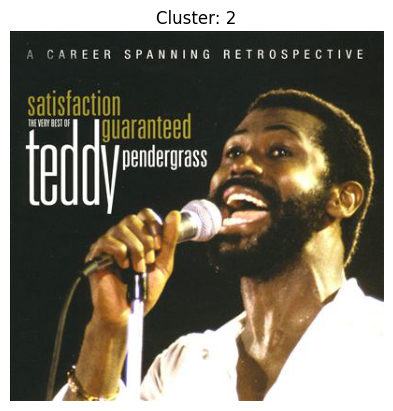

In [ ]:
# Assign labels to images and save
for i in range(len(image_paths)):
    img = Image.open(image_paths[i])
    plt.imshow(img)
    plt.axis('off')
    plt.savefig('path_and_name_for_clustering_output_image_file' + str(i) + '.jpg')